In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt # for plots
import seaborn as sns
%matplotlib inline

In [2]:
#fetching data from S&P 500 index using yfinance api
sp500_df = yf.download('^GSPC', start = datetime.datetime(2010, 1, 1), end = datetime.datetime(2019, 12, 31))

[*********************100%%**********************]  1 of 1 completed


In [3]:
#making changes to the dataset
sp500_df = sp500_df.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume']) #dropping unnecessary columns
sp500_df["Date"] = sp500_df.index #shifting indexes to date column
sp500_df['Date'] = pd.to_datetime(sp500_df['Date']) #changing the date format
sp500_df.reset_index(drop=True, inplace=True) #dropping index values
sp500_df = sp500_df.rename(columns={'Date': 'ds','Adj Close': 'y'}) #renaming columns

In [4]:
#creating test and train datasets
train_df, test_df = sp500_df.loc[(sp500_df['ds'] <= '2018-12-31')], sp500_df.loc[(sp500_df['ds'] > '2018-12-31')]

In [5]:
#importing and training prophet
from prophet import Prophet
m = Prophet()
m.fit(train_df)

22:21:54 - cmdstanpy - INFO - Chain [1] start processing
22:21:54 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
#predicting for the next 251 timepoints (year 2019)
future_prices = m.make_future_dataframe(periods=251)
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2510,2019-09-04,3053.695007,2947.293811,3167.096468
2511,2019-09-05,3055.341045,2938.651262,3163.419098
2512,2019-09-06,3056.155498,2939.000509,3157.956013
2513,2019-09-07,3066.590622,2951.836101,3174.826496
2514,2019-09-08,3068.348023,2957.744211,3177.493805


In [8]:
#extracting predictions from prophet model
predictions = forecast.tail(251)
predictions.head();

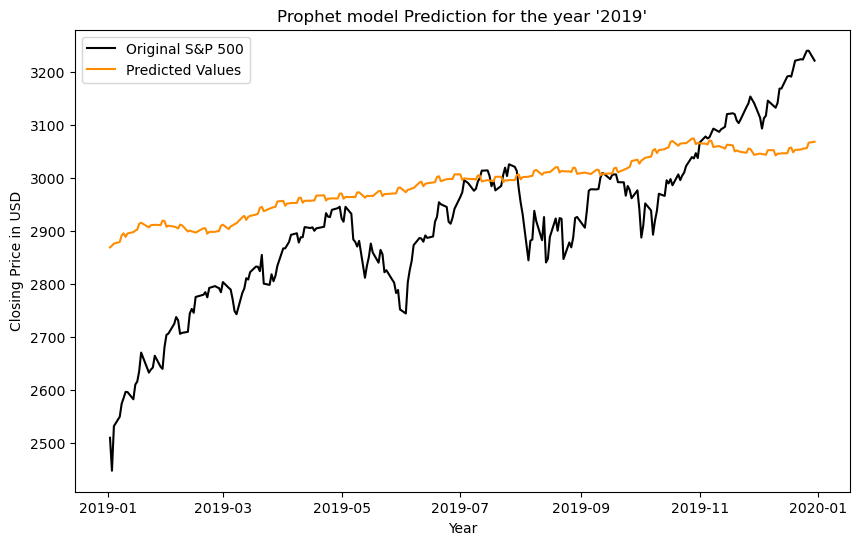

In [9]:
#plotting the model preditions for comparison
plt.figure(figsize=(10, 6))
plt.plot(test_df.ds, test_df['y'], color= 'black', label='Original S&P 500')
plt.plot(test_df.ds, predictions.yhat, color= 'darkorange', label='Predicted Values')
plt.title("Prophet model Prediction for the year '2019'")
plt.xlabel('Year')
plt.ylabel('Closing Price in USD')
plt.legend()
plt.show()

In [10]:
#model validation
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_squared_error(test_df['y'], predictions.yhat)
rmse = np.sqrt(mean_squared_error(test_df['y'], predictions.yhat))
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 16749.41203525096
Root Mean Squared Error: 129.41951952951672
